### Exchange Rates

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Enables Jupyter to display graphs 
%matplotlib inline 

In [67]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [68]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Cleaning the data

- We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
- We change the Time column to a datetime data type.
- We sort the values by Time in ascending order.
- We reset the index (and drop the initial index).

In [69]:
exchange_rates.rename(columns={"[US dollar ]": "US_dollar",
                               "Period\\Unit:": "Time"},
                     inplace=True)
exchange_rates["Time"] = pd.to_datetime(exchange_rates["Time"])
exchange_rates.sort_values("Time", inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

exchange_rates.columns

Index(['Time', '[Australian dollar ]', '[Bulgarian lev ]', '[Brazilian real ]',
       '[Canadian dollar ]', '[Swiss franc ]', '[Chinese yuan renminbi ]',
       '[Cypriot pound ]', '[Czech koruna ]', '[Danish krone ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Maltese lira ]',
       '[Mexican peso ]', '[Malaysian ringgit ]', '[Norwegian krone ]',
       '[New Zealand dollar ]', '[Philippine peso ]', '[Polish zloty ]',
       '[Romanian leu ]', '[Russian rouble ]', '[Swedish krona ]',
       '[Singapore dollar ]', '[Slovenian tolar ]', '[Slovak koruna ]',
       '[Thai baht ]', '[Turkish lira ]', 'US_dollar',
       '[South African rand ]'],
      dtype='object')

### Create a `euro_to_dollar` dataframe with just the `Time` and `US_dollar` columns

In [70]:
euro_to_dollar = exchange_rates[["Time", "US_dollar"]].copy()
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.3789     1
0.8307     1
1.3067     1
0.9808     1
1.0857     1
Name: US_dollar, Length: 3528, dtype: int64

### Drop all rows with `-` values

In [71]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != '-']
euro_to_dollar["US_dollar"].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.0867    6
1.1268    6
         ..
1.0976    1
0.9197    1
0.9593    1
1.0741    1
1.0857    1
Name: US_dollar, Length: 3527, dtype: int64

In [72]:
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float)

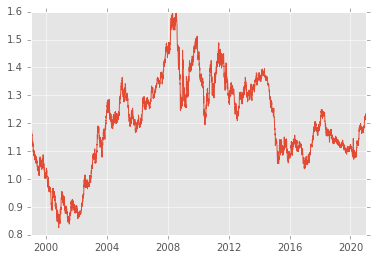

In [73]:
plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"])
plt.show()

## Rolling Mean

In [74]:
euro_to_dollar["rolling_mean"] = euro_to_dollar["US_dollar"].rolling(30).mean()
euro_to_dollar[28:39]

,Time,US_dollar,rolling_mean
28,1999-02-11,1.1312,NaN
29,1999-02-12,1.1244,1.150667
30,1999-02-15,1.1238,1.148830
31,1999-02-16,1.1176,1.146783
32,1999-02-17,1.1253,1.145150
33,1999-02-18,1.1232,1.143817
34,1999-02-19,1.1163,1.142163
35,1999-02-22,1.0992,1.140240
36,1999-02-23,1.0969,1.138403
37,1999-02-24,1.1037,1.136047


## How the euro-dollar rate changed under the last three US presidents: 
- George W. Bush (2001-2009)
- Barack Obama (2009-2017) 
- Donald Trump (2017-2021)).

### Create a subset of the `euro_to_dollar` dataframe

In [75]:
import datetime as dt
# Create Year column
euro_to_dollar["Year"] = euro_to_dollar["Time"].dt.year
# Create subset of euro_to_dollar dataframe
eur_usd_2001_2020 = euro_to_dollar[euro_to_dollar["Year"].between(2001, 2020)]
# Reset Index
eur_usd_2001_2020.reset_index(drop=True, inplace=True)
eur_usd_2001_2020

,Time,US_dollar,rolling_mean,Year
0,2001-01-02,0.9423,0.883343,2001
1,2001-01-03,0.9530,0.886660,2001
2,2001-01-04,0.9458,0.889893,2001
3,2001-01-05,0.9545,0.893463,2001
4,2001-01-08,0.9497,0.897023,2001
...,...,...,...,...
5113,2020-12-24,1.2193,1.204173,2020
5114,2020-12-28,1.2219,1.205520,2020
5115,2020-12-29,1.2259,1.206950,2020
5116,2020-12-30,1.2281,1.208280,2020


### Graph the change of EUR/USD exhange rate over the 3 US presidents' timeline

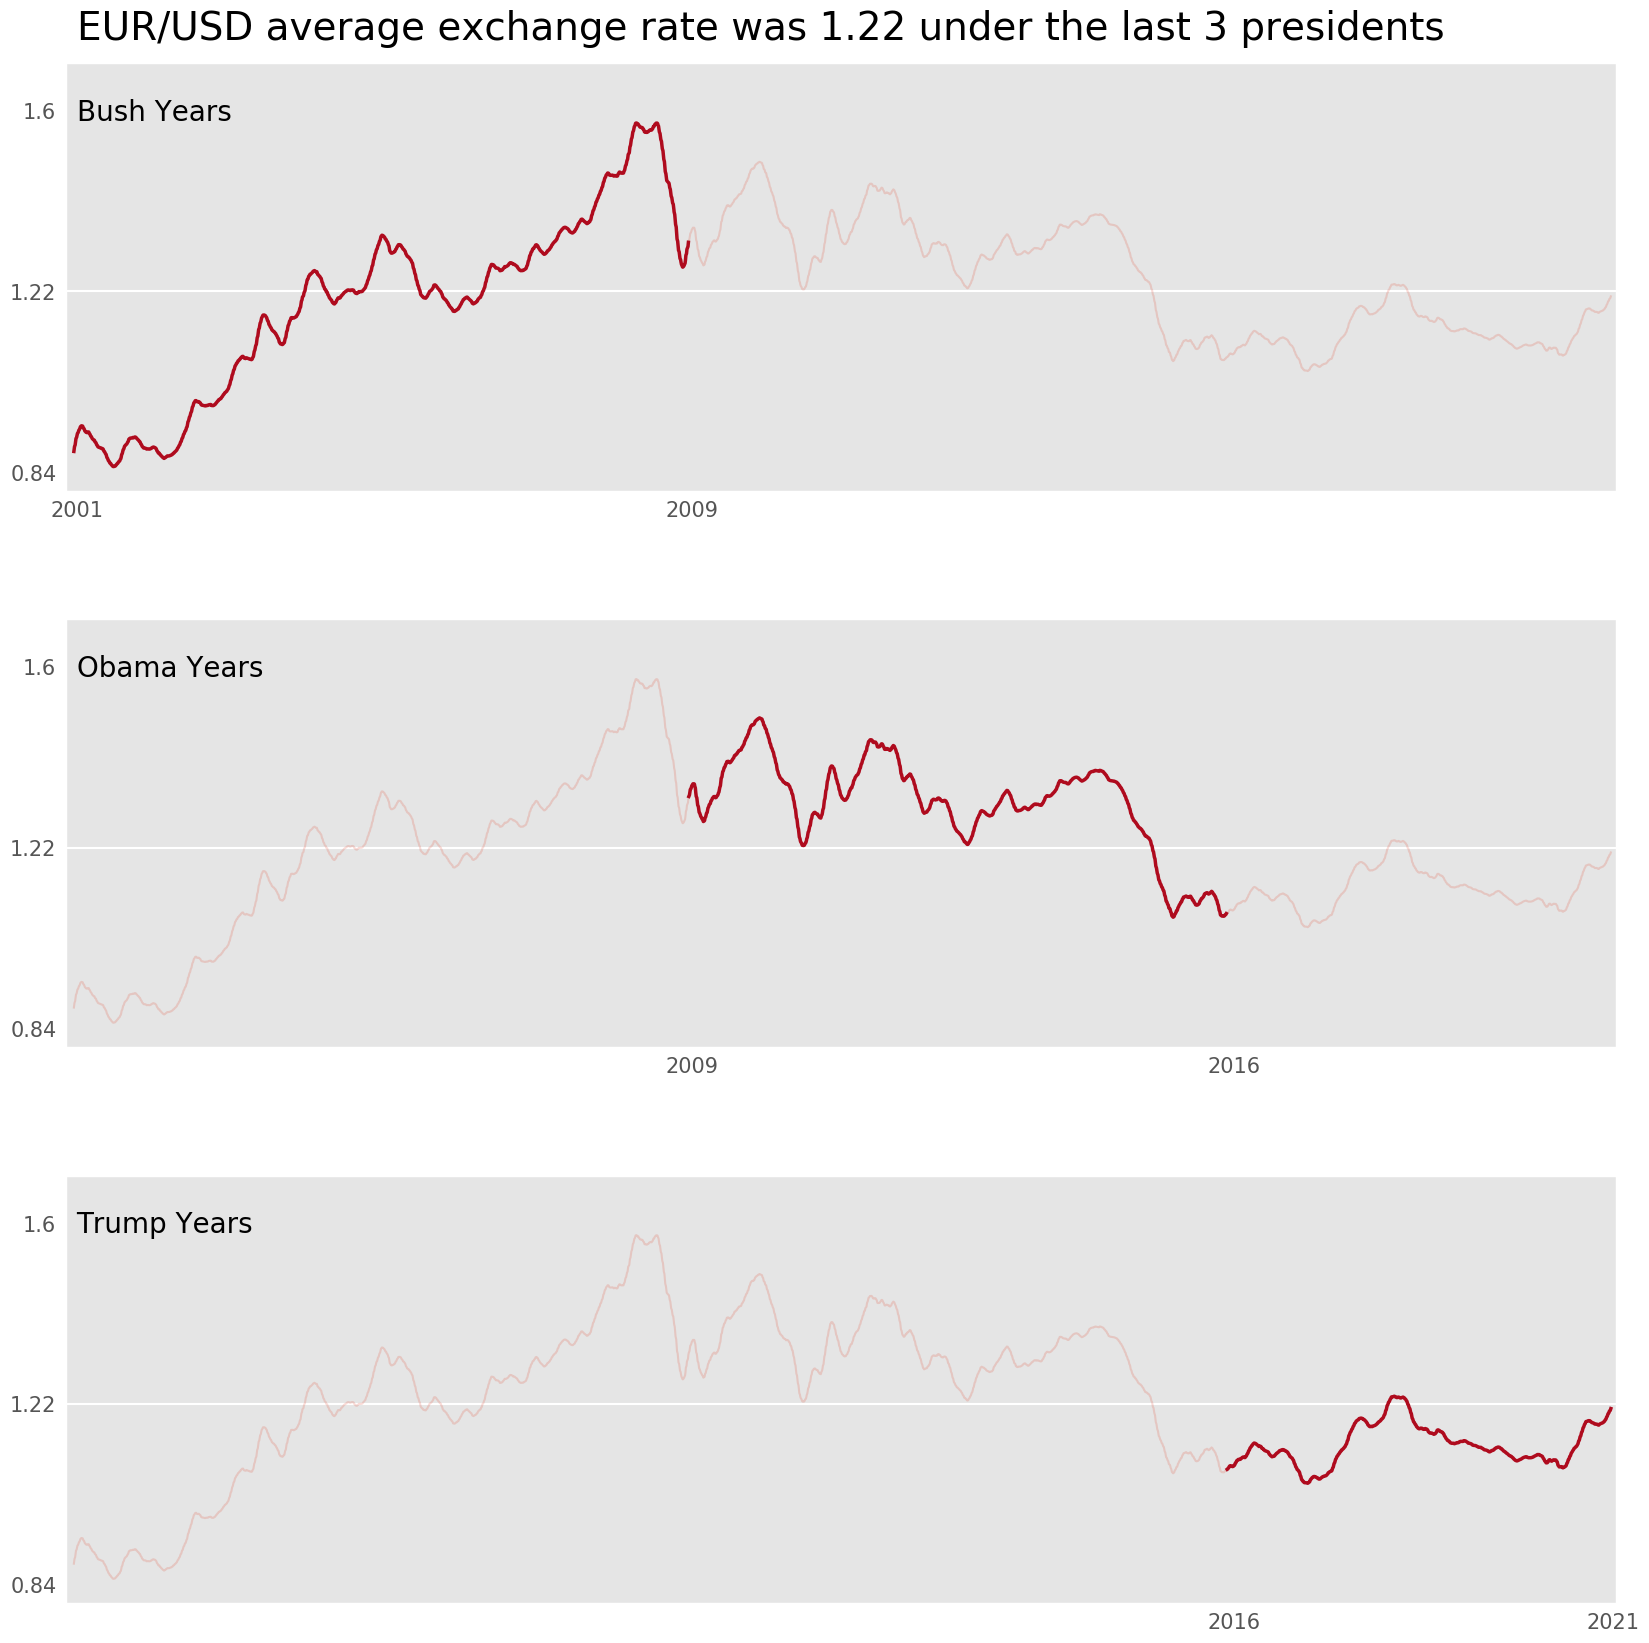

In [283]:
import matplotlib.style as style
style.use('ggplot')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
axes = [ax1, ax2, ax3]

minn = round(eur_usd_2001_2020["US_dollar"].min(), 2)
avg = round(eur_usd_2001_2020["US_dollar"].mean(), 2)
maxx = round(eur_usd_2001_2020["US_dollar"].max(), 2)

# Plot the same graph 3 times
for ax in axes:
    ax.grid(False) # Hide grid
    ax.axhline(y=avg, c='white') # Create line through the mean
    ax.tick_params(top=False, bottom=False, left=False, right=False) #Hide ticks
    
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([minn, avg, maxx])
    ax.set_yticklabels([minn, avg, maxx], fontsize=15)
    ax.set_xlim(730450, 737815)
    
    ax.plot(eur_usd_2001_2020["Time"], eur_usd_2001_2020["rolling_mean"], alpha=0.2) #Plot line with transparency to setup storytelling

# 1st plot: Bush years
ax1.plot(eur_usd_2001_2020["Time"].where(eur_usd_2001_2020["Year"] <= 2008), 
         eur_usd_2001_2020["rolling_mean"].where(eur_usd_2001_2020["Year"] <= 2008),
        color='#af0b1e', linewidth=2.5)

# ax1.get_xticks() = [728659, 730120, 731581, 733042, 734503, 735964, 737425, 738886])
# Based on the ax1.get_xticks() method, I had to guess the x-cordinates by trial & error, 
ax1.set_xticks([730500, 733425]) 
ax1.set_xticklabels(['2001', '2009'], fontsize=15)
ax1.text(x=730500, y=1.58, s='Bush Years', size=20)

#Main title
ax1.text(x=730500, y=1.75, s='EUR/USD average exchange rate was 1.22 under the last 3 presidents', size=28)


# 2nd plot: Obama years
ax2.plot(eur_usd_2001_2020["Time"].where(eur_usd_2001_2020["Year"].between(2009, 2015)), 
         eur_usd_2001_2020["rolling_mean"].where(eur_usd_2001_2020["Year"].between(2009, 2015)),
        color='#af0b1e', linewidth=2.5)

ax2.set_xticks([733425, 736000])
ax2.set_xticklabels(['2009','2016'], fontsize=15)
ax2.text(x=730500, y=1.58, s='Obama Years', size=20)

# 3rd plot: Trump years
ax3.plot(eur_usd_2001_2020["Time"].where(eur_usd_2001_2020["Year"] >= 2016), 
         eur_usd_2001_2020["rolling_mean"].where(eur_usd_2001_2020["Year"] >= 2016),
        color='#af0b1e', linewidth=2.5)
ax3.text(x=730500, y=1.58, s='Trump Years',  size=20)

ax3.set_xticks([736000, 737800])
ax3.set_xticklabels(['2016','2021'], fontsize=15)

fig.subplots_adjust(hspace=0.3)
plt.show()